In [290]:
import yfinance as yf
import pandas as pd
import panel as pn
pn.extension('plotly')
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv()

from plotly.subplots import make_subplots
import re
import yfinance as yf
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

import tweepy
tweepy_key = os.getenv("TWEEPY_API_KEY")
api =tweepy.API(tweepy_key,wait_on_rate_limit=True)
client = tweepy.Client(tweepy_key)

from pytrends.request import TrendReq

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from pathlib import Path

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peeta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
def normil(df):
    df = (df-df.min())/(df.max()-df.min())
    return df

In [224]:
def comparison(phrase, ticker):
    pytrends=TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([phrase], cat=0, timeframe='today 3-m')
    data = pytrends.interest_over_time() 
    ndata=normil(data[phrase][0:-2])
    lunaprice = yf.Ticker(ticker)
    lunaprice = lunaprice.history(
        start='2022-02-28',
        end='2022-05-30',
        interval='60m'
    )
    lunaprice = lunaprice['Close']
    nlunaprice=normil(lunaprice)
    return ndata.plot(), nlunaprice.plot()

In [241]:
def comparisonSS(phrase, ticker):
    pytrends=TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([phrase], cat=0, timeframe='today 3-m')
    data = pytrends.interest_over_time()
    lunaprice = yf.Ticker(ticker)
    lunaprice = lunaprice.history(
        start='2022-02-28',
        end='2022-05-30',
        interval='60m')
    data.index=pd.DatetimeIndex(data.index, tz='US/Eastern') # naive--> aware
    #lunaprice.index=pd.DatetimeIndex(lunaprice.index, tz='US/Eastern') # naive--> aware
    comb=data.join(lunaprice)
    scaler.fit(comb[[phrase, 'Close']])
    comb[[phrase, 'Close']]=scaler.transform(comb[[phrase, 'Close']])
    return comb[0:-2].plot(y=['Close', phrase])

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

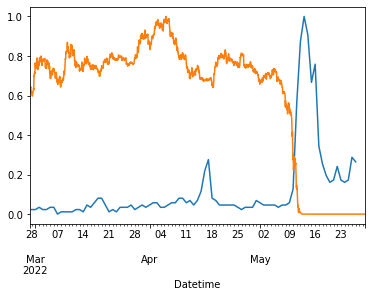

In [233]:
comparison('luna', 'LUNA1-USD')

<AxesSubplot:xlabel='date'>

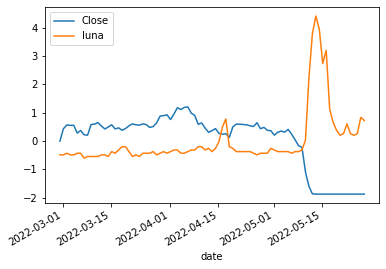

In [243]:
comparisonSS('luna', 'LUNA1-USD')

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

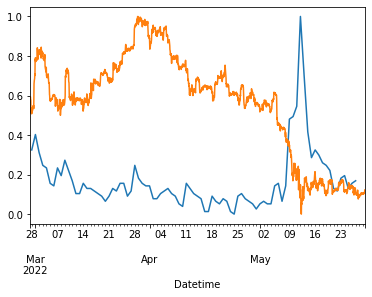

In [235]:
comparison('Bitcoin', "BTC-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

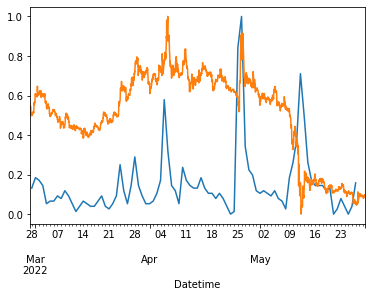

In [236]:
comparison('dogecoin', "DOGE-USD")

<AxesSubplot:xlabel='date'>

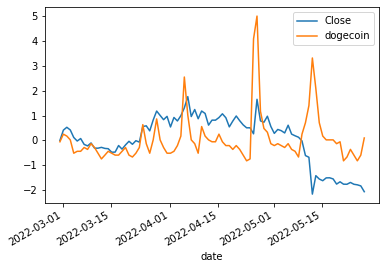

In [244]:
comparisonSS('dogecoin', "DOGE-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

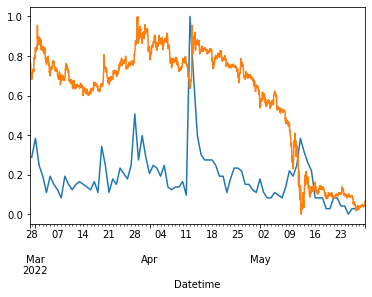

In [238]:
comparison('shiba', "SHIB-USD")

<AxesSubplot:xlabel='date'>

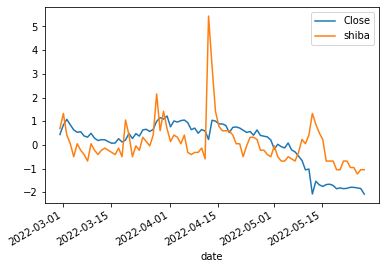

In [245]:
comparisonSS('shiba', "SHIB-USD")

(<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>)

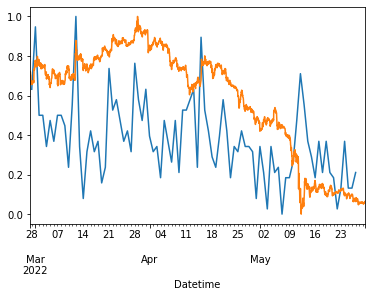

In [239]:
comparison('ripple', "XRP-USD")

<AxesSubplot:xlabel='date'>

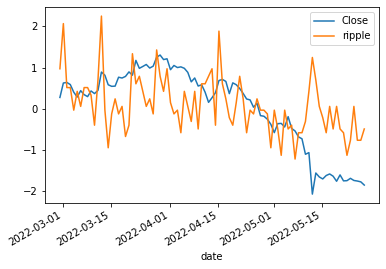

In [242]:
comparisonSS('ripple', "XRP-USD")

In [269]:
tweepyClient = tweepy.Client(tweepy_key)

In [296]:
def tweets(start_time, end_time, iterations, query):
    datelist = pd.date_range(start_time, end_time, periods=iterations).tolist()
    tweets=[]
    date=[]
    counter = 0
    for time in datelist:
        if counter > 1:
            #Fetching Tweets
            response = tweepyClient.search_recent_tweets(
                query,
                max_results=10,
                start_time=start,
                end_time=time,
                tweet_fields=["created_at"])
    
            if type(response.data) != type(None):
                #Data Cleaning
                for resp in response.data:
                    # tweet = clean_tweet(resp)
                    tweet = str(resp)
                    tweets.append(tweet)
                    date.append(resp.created_at)
        counter=counter+1
        start=time
    tweet_df=pd.DataFrame({'time':date, 'tweet':tweets})
    tweet_df=tweet_df.sort_values(by='time', ascending=True).set_index('time')
    return tweet_df

In [484]:
df=tweets('2022-05-29', '2022-05-30', 10, 'btc OR bitcoin OR crypto -is:retweet lang:en')

In [ ]:

file_path = Path("Resources/BTC_Large.csv")
df.to_csv(file_path)

In [485]:
df

,tweet
time,
2022-05-29 05:19:53+00:00,RT @altbullx: I booked 70% profits here...and ...
2022-05-29 05:19:54+00:00,@TrustlessState @0xRapha @ethStaker @0xRapha\n...
2022-05-29 05:19:55+00:00,@TheSandstormYT IT WAS A DISASTER .NOT ON ALL ...
2022-05-29 05:19:56+00:00,@Sinfullylu @mofchitman08 Luna wtf is this
2022-05-29 05:19:56+00:00,RT @binance: Current LUNA (old) holders may be...
...,...
2022-05-29 23:59:57+00:00,RT @Oly245: Great video on @XcademyOfficial by...
2022-05-29 23:59:57+00:00,@coinbase @CoinbaseSupport the community wants...
2022-05-29 23:59:57+00:00,RT @LunaBurnx: 🌕 WELCOME TO #LUNABURNX 🌕\n\n🔥U...
